In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("hemnet_clean.xlsx")

## Create X and y and Split

In [3]:
target_col = "price_sold"

In [4]:
X = df.drop(target_col, axis = 1)

y = df[target_col]

In [5]:
from sklearn.model_selection import train_test_split

# This order matters
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

## Train Model

In [6]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=0) 
model = regressor.fit(X_train, y_train)

### Make The prediction with train model

In [7]:
arr = model.predict(X_test)

## Data clean to DF

In [8]:
series = pd.Series(arr) 

In [9]:
df = pd.DataFrame(series)

In [10]:
ser = y_test.to_frame()

In [11]:
ser = ser.reset_index().drop(columns = "index")

In [12]:
df["Real Price"] = ser

In [13]:
df = df.rename(columns = {0:"Price Prediction"})

In [14]:
df["Price Prediction"] = df["Price Prediction"].astype("int")

In [15]:
df

,Price Prediction,Real Price
0,3453500,3620000
1,3555000,2740000
2,2805500,2875000
3,3919000,3100000
4,5692000,6250000
...,...,...
3221,4325000,3680000
3222,3726200,3275000
3223,2553600,2400000
3224,6166000,4585000


## Evaluation


In [149]:
from sklearn import metrics

errors = abs((arr - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors), 2))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(df["Real Price"], df["Price Prediction"]))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(df["Real Price"], df["Price Prediction"]))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(df["Real Price"], df["Price Prediction"], squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(df["Real Price"], df["Price Prediction"]))
print('Explained Variance Score:', metrics.explained_variance_score(df["Real Price"], df["Price Prediction"]))
print('Max Error:', metrics.max_error(df["Real Price"], df["Price Prediction"]))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(df["Real Price"], df["Price Prediction"]))
print('Median Absolute Error:', metrics.median_absolute_error(df["Real Price"], df["Price Prediction"]))
print('R^2:', metrics.r2_score(df["Real Price"], df["Price Prediction"]))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(df["Real Price"], df["Price Prediction"]))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(df["Real Price"], df["Price Prediction"]))

Mean Relative Error: 0.12
Mean Absolute Error (MAE): 614797.778983261
Mean Squared Error (MSE): 863261299251.6389
Root Mean Squared Error (RMSE): 929118.5603848622
Mean Absolute Percentage Error (MAPE): 0.12207022378001191
Explained Variance Score: 0.8600778202541549
Max Error: 6852500
Mean Squared Log Error: 0.025133347882733626
Median Absolute Error: 395250.0
R^2: 0.8599944185943897
Mean Poisson Deviance: 132919.27274561248
Mean Gamma Deviance: 0.024784789928055582


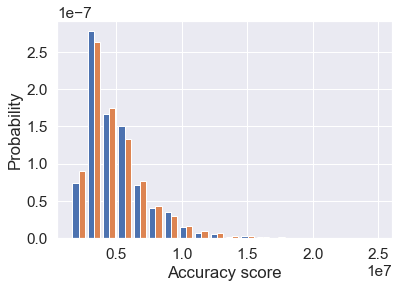

In [98]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(df, bins=20, density=True)
#ax.axvline(df["Real Price"], ls="--", color="r")
#score_label = f"Score on original\ndata: {df["Real Price"]:.2f}\n(p-value: {pvalue_iris:.3f})"
#ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability")

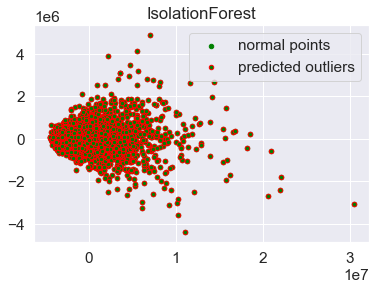

In [151]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(df)
res=pd.DataFrame(pca.transform(df))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res[0],res[1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

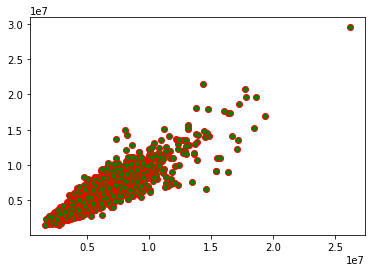

In [16]:
plt.scatter(df.iloc[:,0],df.iloc[:,1], c='green',  edgecolor="red",label="predicted outliers");